# Analysis of Air Quality and Asthma Prevalence

## Introduction
In this notebook, we analyze the relationship between air quality, specifically PM2.5 concentration, and asthma prevalence across various countries. This analysis is part of our broader study on the potential health impacts of air pollution. By examining asthma prevalence rather than hospital admissions, we aim to understand whether higher levels of air pollution correlate with a higher number of people experiencing asthma symptoms.

### Objectives
1. **Compare Air Quality and Asthma Prevalence**: Investigate the correlation between PM2.5 concentration and asthma prevalence across different countries and over time.
2. **Evaluate Patterns**: Identify patterns or trends that may indicate a relationship between air pollution and asthma rates.
3. **Support or Refute Hypothesis**: Our hypothesis is that countries with higher PM2.5 levels will also have a higher prevalence of asthma, indicating a potential public health impact of air quality.

### Data Preparation
The analysis will proceed in several phases:
1. **Import Dependencies**: Load the required libraries for data handling and visualization.
2. **Load Datasets**: Import the cleaned air quality and asthma prevalence datasets.
3. **Merge Data**: Combine both datasets to allow comparisons on a country-by-country and year-by-year basis.

Following the data preparation, we will perform statistical and visual analyses to explore potential correlations and draw conclusions about the impact of air quality on asthma prevalence.


In [1]:
# Dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from pprint import pprint
from scipy import stats

# Import the function to retrieve country names from country codes
from country_codes import get_country

In [2]:
# Define file paths for the cleaned datasets
csv_airquality = Path("Cleaned_Data/cleaned_airquality.csv")
csv_asthma = Path("Cleaned_Data/cleaned_asthma_prevalence.csv")

# Load the CSV files into DataFrames
airquality_df = pd.read_csv(csv_airquality)
asthma_df = pd.read_csv(csv_asthma)

In [3]:
# Convert country codes to country names in the air quality DataFrame
for index, row in airquality_df.iterrows():
    airquality_df.loc[index, 'Country'] = get_country(airquality_df.loc[index, 'Country'])

# List and display the unique countries in the air quality DataFrame
airquality_countries = airquality_df['Country'].unique().tolist()
print(f"{len(airquality_countries)} countries found in the air quality data.")
pprint(airquality_countries)

93 countries found in the air quality data.
['United Arab Emirates',
 'Afghanistan',
 'Argentina',
 'Austria',
 'Australia',
 'Bosnia and Herzegovina',
 'Bangladesh',
 'Belgium',
 'Bulgaria',
 'Bahrain',
 'Brazil',
 'Canada',
 'Switzerland',
 "Cote d'Ivoire",
 'Chile',
 'China',
 'Colombia',
 'Costa Rica',
 'Curaçao',
 'Cyprus',
 'Czechia',
 'Germany',
 'Denmark',
 'Algeria',
 'Ecuador',
 'Estonia',
 'Spain',
 'Ethiopia',
 'Finland',
 'France',
 'United Kingdom of Great Britain and Northern Ireland',
 'Georgia',
 'Ghana',
 'Guinea',
 'Greece',
 'Guatemala',
 'Hong Kong',
 'Croatia',
 'Hungary',
 'Indonesia',
 'Ireland',
 'Israel',
 'India',
 'Iraq',
 'Iran (Islamic Republic of)',
 'Iceland',
 'Italy',
 'Jordan',
 'Japan',
 'Kyrgyzstan',
 'Republic of Korea',
 'Kuwait',
 'Kazakhstan',
 "Lao People's Democratic Republic",
 'Sri Lanka',
 'Lithuania',
 'North Macedonia',
 'Mali',
 'Myanmar',
 'Mongolia',
 'Macao',
 'Mexico',
 'The Netherlands',
 'Norway',
 'Nepal',
 'New Zealand',
 'Peru',

In [12]:
# Rename the asthma cases column for simplicity
asthma_df.rename(columns={"Asthma Cases per 100 (Age-Standardized, Both Sexes)": "Asthma"}, inplace=True)

# List and display the unique countries in the asthma DataFrame
asthma_countries = asthma_df['Country'].unique().tolist()
print(f"{len(asthma_countries)} countries found in the asthma data.")
pprint(asthma_countries)

226 countries found in the asthma data.
['Afghanistan',
 'African Region (WHO)',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo',
 'Cook Islands',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Democratic Republic of Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'East Asia & Pacific (WB)',
 'East Timor',
 'Eastern Mediterranean Region (WHO)',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'England',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 

## Merge Datasets

In [13]:
# Merge the air quality and asthma DataFrames on 'Country' and 'Year' columns
# Using an inner join to keep only countries with data in both datasets
analysis_df = pd.merge(airquality_df, asthma_df, on=["Country", "Year"], how="inner")

# Display the first few rows of the merged DataFrame
analysis_df.head()

,Country,Year,PM25,Asthma
0,United Arab Emirates,2015,118.714286,8.349840
1,United Arab Emirates,2016,92.000000,7.665928
2,United Arab Emirates,2018,122.683432,7.069434
3,United Arab Emirates,2019,111.881940,7.179908
4,Afghanistan,2019,187.457627,4.281019


## Visualizing Top and Bottom 10 Countries for PM2.5 level and Asthma Prevalence

### Top 10 Countries with the Best Air Quality (Based on PM2.5)

In this section, we identify the top 10 countries with the lowest PM2.5 concentrations from 2015 to 2021, representing the best air quality. This analysis allows us to observe which countries have consistently maintained low levels of air pollution.

In [14]:
# Top 10 countries with the best air quality (lowest PM2.5 levels)
analysis_sorted_by_PM25 = analysis_df.sort_values('PM25', ascending=True)
analysis_sorted_by_PM25[['Country', 'Year', 'PM25']].head(10)

,Country,Year,PM25
52,Switzerland,2019,2.242184
51,Switzerland,2018,2.414773
49,Switzerland,2016,2.451613
50,Switzerland,2017,3.397959
147,Iceland,2018,15.598901
148,Iceland,2019,16.100292
228,Sweden,2015,16.987805
146,Iceland,2017,18.333333
97,Estonia,2019,19.447247
145,Iceland,2016,21.344086


##### Analysis
The data shows that Switzerland has consistently ranked among the top for best air quality, with other countries such as Iceland, Sweden, and Estonia also appearing frequently among the highest rankings for clean air.


### Top 10 Countries with the Best Asthma Prevalence

Next, we examine the top 10 countries with the lowest asthma prevalence rates from 2015 to 2021. This analysis provides insight into regions with the fewest cases of asthma, regardless of air quality.

In [15]:
# Top 10 countries with the best (lowest) asthma prevalence
analysis_sorted_by_Asthma = analysis_df.sort_values('Asthma', ascending=True)
analysis_sorted_by_Asthma[['Country', 'Year', 'Asthma']].head(10)


,Country,Year,Asthma
193,Nepal,2017,1.043727
194,Nepal,2018,1.059282
195,Nepal,2019,1.072463
22,Bangladesh,2016,1.337310
23,Bangladesh,2017,1.342940
24,Bangladesh,2018,1.361040
25,Bangladesh,2019,1.390907
163,Kazakhstan,2018,1.572167
164,Kazakhstan,2019,1.590705
58,China,2015,1.680620


##### Analysis
The data indicates that Nepal has the lowest asthma prevalence, followed by Bangladesh, Kazakhstan, and China. Interestingly, these countries also tend to have lower rankings in air quality during the same period. This could be due to several factors, such as limited healthcare access or fewer resources dedicated to asthma diagnosis and treatment in these regions, which may lead to underreporting or lower recorded prevalence of asthma.

### Bottom 10 Countries with Worst Air Quality (Based on PM2.5)
Here, we identify the bottom 10 countries with the highest PM2.5 concentrations from 2015 to 2021, representing the worst air quality levels. This analysis highlights regions with significant air pollution challenges.

In [16]:
# Bottom 10 countries with the worst air quality (highest PM2.5 levels)
analysis_sorted_by_PM25 = analysis_df.sort_values('PM25', ascending=False)
analysis_sorted_by_PM25[['Country', 'Year', 'PM25']].head(10)

,Country,Year,PM25
4,Afghanistan,2019,187.457627
24,Bangladesh,2018,159.808989
23,Bangladesh,2017,157.497326
176,Mali,2019,153.750000
140,India,2016,147.939673
141,India,2017,143.679880
37,Bahrain,2018,142.812865
25,Bangladesh,2019,142.792493
142,India,2018,139.787106
194,Nepal,2018,137.829545


##### Analysis
The data indicates that Afghanistan and Bangladesh consistently rank among the countries with the worst air quality. Other countries with high PM2.5 levels include Mali, India, Bahrain, and Nepal, suggesting that these regions face ongoing air quality issues.

### Bottom 10 Countries with the Worst Asthma Prevalence

Next, we examine the bottom 10 countries with the highest asthma prevalence rates from 2015 to 2021. This analysis provides insights into the regions where asthma is most prevalent.

In [17]:
# Bottom 10 countries with the worst (highest) asthma prevalence
analysis_sorted_by_Asthma = analysis_df.sort_values('Asthma', ascending=False)
analysis_sorted_by_Asthma[['Country', 'Year', 'Asthma']].head(10)

,Country,Year,Asthma
214,Portugal,2015,9.225774
215,Portugal,2016,9.135996
218,Portugal,2019,9.106180
217,Portugal,2018,9.082142
216,Portugal,2017,9.079505
17,Australia,2018,8.779659
18,Australia,2019,8.768433
16,Australia,2017,8.757421
213,Puerto Rico,2019,8.571064
15,Australia,2016,8.554107


##### Analysis
According to the data, countries with the highest asthma prevalence include Portugal, Australia, and Puerto Rico. These findings highlight regions where asthma poses a significant public health challenge, potentially due to environmental, genetic, or healthcare-related factors.

## Data Analysis

### Correlation Between PM25 concentration and Prevalence of Asthma
In this section, we examine the overall correlation between PM2.5 levels and asthma prevalence across all countries and years. By analyzing this relationship, we aim to understand if higher PM2.5 concentrations correlate with increased or decreased asthma prevalence.


R-value: -0.51
Linear model: [Asthma] = -0.0275 * [PM25] + 6.25


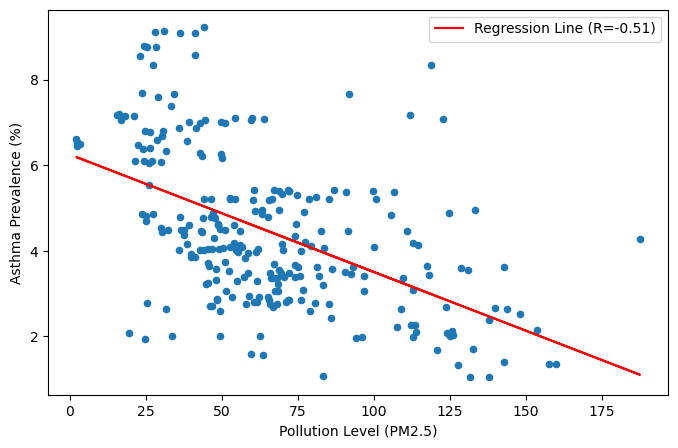

In [18]:
# Scatter plot to examine correlation between PM2.5 levels and asthma prevalence
analysis_df.plot.scatter(x='PM25', y='Asthma', figsize=(8, 5))

# Extract PM2.5 and asthma data for correlation analysis
x_data = analysis_df['PM25']
y_data = analysis_df['Asthma']

# Perform linear regression to determine correlation
slope, intercept, r_value, p_value, std_err = stats.linregress(x_data, y_data)
print(f"R-value: {r_value:.2f}")
print(f"Linear model: [Asthma] = {slope:.4f} * [PM25] + {intercept:.2f}")

# Plot the regression line on the scatter plot
y_regression_line = slope * x_data + intercept
plt.plot(x_data, y_regression_line, 'r', label=f'Regression Line (R={r_value:.2f})')
plt.xlabel('Pollution Level (PM2.5)')
plt.ylabel('Asthma Prevalence (%)')
plt.legend()

# Save the plot to the Images folder
plt.savefig('Images/PM25_and_Asthma.png')

# Display the plot
plt.show()

##### Analysis
The scatter plot below shows a surprising trend: there is a moderate negative correlation (R-value = -0.51) between PM2.5 concentration and asthma prevalence. This suggests that, contrary to expectations, countries with higher PM2.5 levels tend to report lower asthma prevalence rates.

Several factors could influence this trend, including:
- **Air Quality Regulations**: Countries with stricter air quality regulations might also have better reporting on respiratory health issues.
- **Healthcare and Reporting Differences**: Variations in healthcare infrastructure and awareness about asthma could lead to more accurate reporting in some countries, potentially resulting in higher recorded prevalence rates even if the air quality is relatively good.
- **Socioeconomic and Regional Factors**: Economic factors and regional practices may impact both air quality and healthcare accessibility, affecting asthma diagnosis and reporting.

The linear regression model further emphasizes this negative correlation, with the model suggesting that an increase in PM2.5 concentration is associated with a slight decrease in asthma prevalence. While this correlation is counterintuitive, it highlights the complexity of factors that may influence asthma rates beyond air pollution alone.

### Changes in Air Quality and Asthma Prevalence over the Years

In this section, we examine how PM2.5 concentration (air quality) and asthma prevalence have changed over the years 2015 to 2019. Using box plots, we explore the variation in both metrics across these years, highlighting any trends or shifts in data consistency and range.

Years in dataset: [2015, 2016, 2017, 2018, 2019]


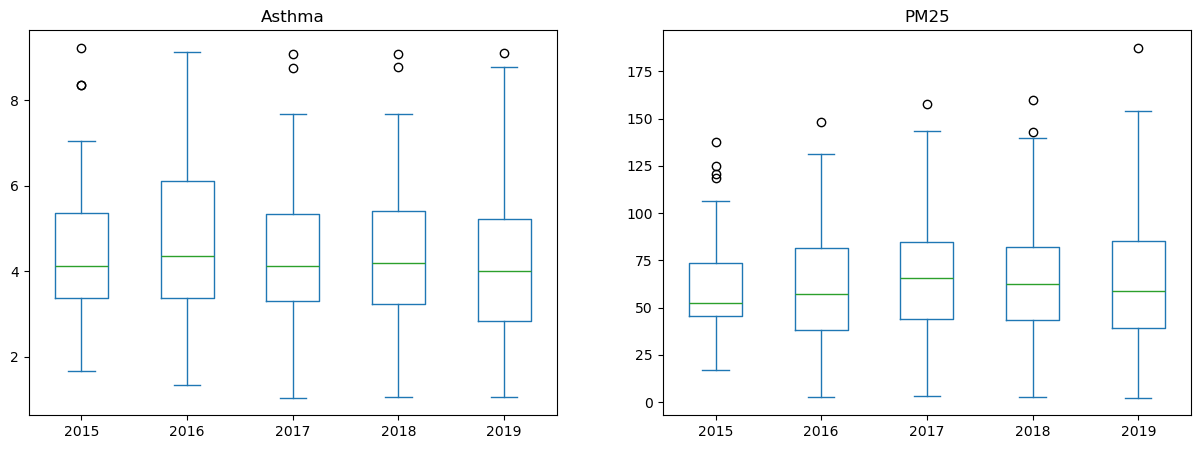

In [22]:
# Extract unique years in sorted order for analysis
year_list = sorted(analysis_df['Year'].unique().tolist())
print("Years in dataset:", year_list)

# Box plot to visualize changes in PM2.5 and asthma prevalence over the years
analysis_df.plot.box('Year',column=['PM25','Asthma'],figsize=(15,5))
plt.show()



##### Analysis
- **PM2.5 Concentration**: The box plots indicate that air quality variability has gradually increased from 2015 onward. In 2015, PM2.5 levels were relatively consistent, but the variation widens in subsequent years, suggesting increased fluctuation in air pollution levels across countries.
- **Asthma Prevalence**: In contrast, the median asthma prevalence remains fairly consistent around 4% across the years. Despite a wide distribution, this stability in the median indicates that asthma prevalence did not vary significantly over time, even as air quality levels fluctuated.

These insights suggest that while air quality variability increased, asthma prevalence remained relatively steady, possibly hinting at additional influencing factors beyond air pollution.

### PM2.5 Trends in Selected Countries

We further explore how PM2.5 concentration has varied over time in specific countries. In this example, we examine Australia and Sweden to understand regional trends in air quality.

<Figure size 640x480 with 0 Axes>

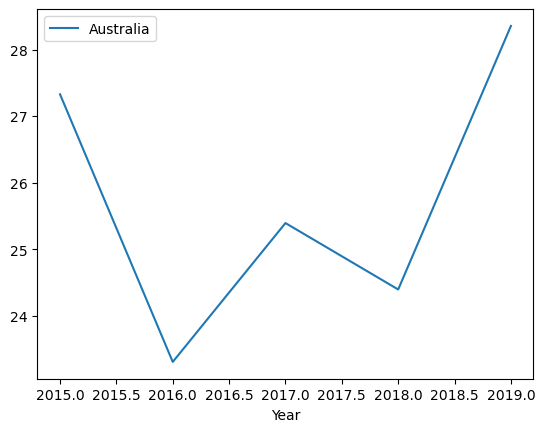

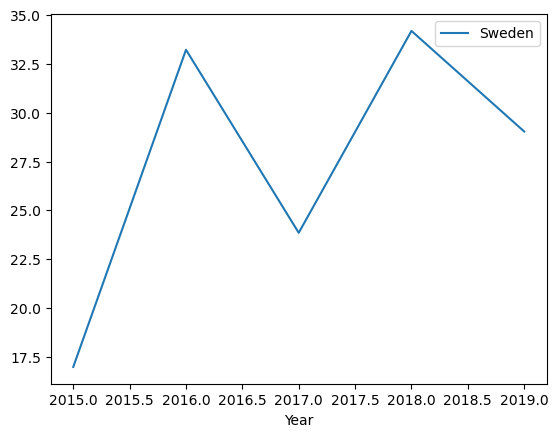

In [23]:
# Line plot for PM2.5 trends in selected countries

# Plotting PM2.5 levels for Australia
country = 'Australia'
country_df = analysis_df.loc[analysis_df['Country'] == country, :]
plt.figure()
country_df.plot.line(x='Year', y='PM25', label=country)

# Plotting PM2.5 levels for Sweden
country = 'Sweden'
country_df = analysis_df.loc[analysis_df['Country'] == country, :]
country_df.plot.line(x='Year', y='PM25', label=country)

# Show the line plot for both countries
plt.show()

##### Analysis
- **Australia**: Observing the trend of PM2.5 levels over the years for Australia provides insights into its air quality stability or fluctuations.
- **Sweden**: Similarly, tracking PM2.5 levels in Sweden helps identify any regional shifts and compare air quality trends across different countries.

These visualizations allow us to compare air quality trends on a country-by-country basis, offering a closer look at potential regional differences.

# Key Question: Does Air Quality Impact Asthma Prevalence?

## Conclusion
Based on the data and analysis in this project, we observe a moderate negative correlation between PM2.5 concentration and asthma prevalence. This unexpected result suggests that as air quality worsens, asthma prevalence may improve. However, this counterintuitive trend likely reflects additional factors influencing asthma prevalence beyond air pollution levels, including:

- **Air Quality Regulations**: Differences in regulations across countries may lead to variations in how air quality impacts health outcomes.
- **Healthcare and Reporting Variability**: Countries with more robust healthcare infrastructure and better awareness of asthma may report higher prevalence rates, even if air quality is relatively good.
- **Socioeconomic and Regional Differences**: Economic and regional factors can also affect air quality, healthcare accessibility, and, subsequently, asthma reporting.

For example, countries like Bangladesh and Nepal, which rank low in air quality, also report lower asthma prevalence. This could be due to limited healthcare resources and reporting mechanisms. These findings underscore the complexity of asthma as a health condition and the influence of external factors beyond air quality alone.
